In [ ]:
!pip install pyLDAvis
!pip install gensim
!pip install --upgrade pip

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: FutureWarning: The default value of regex will change from True to False in a future version.


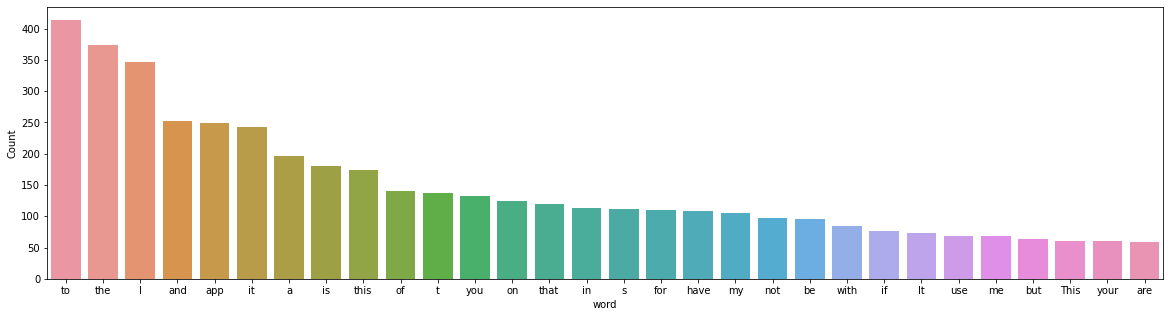

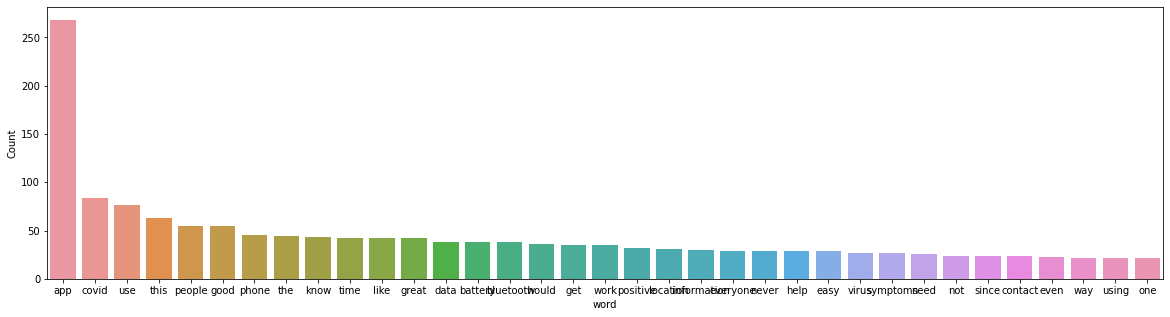

In [ ]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df = pd.read_json('PA.json', orient='records')
df.head()

def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

df['comment'] = df['comment'].str.replace("[^a-zA-Z#]", " ")
freq_words(df['comment'])

# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['comment'] = df['comment'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['comment']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

freq_words(reviews, 35)



In [ ]:
!python -m spacy download en # one time run

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output


tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


['this', 'app', 'fatally', 'flawed', 'they', 'designed', 'way', 'trigger', 'alert', 'test', 'positive', 'public', 'health', 'worker', 'call', 'positive', 'test', 'give', 'code', 'they', 'put', 'resources', 'place', 'make', 'sure', 'could', 'call', 'everyone', 'promptly', 'makes', 'app', 'pretty', 'much', 'useless']


In [ ]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

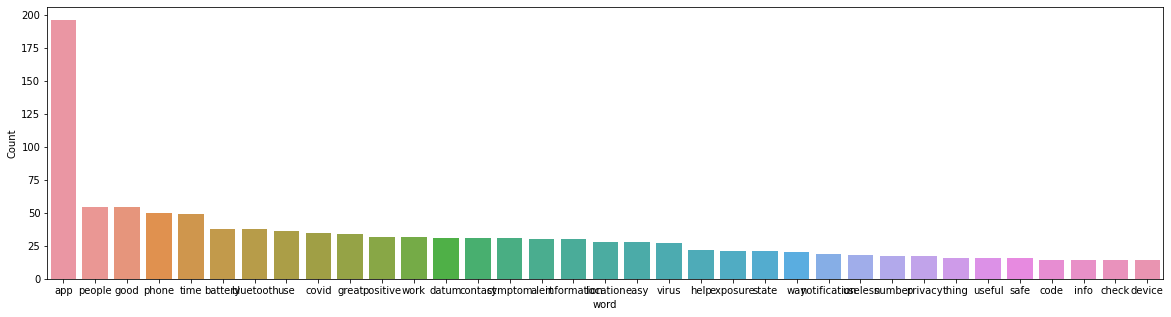

In [ ]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 35)

In [ ]:
dictionary = corpora.Dictionary(reviews_2)

doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)


lda_model.print_topics()

In [ ]:
lda_model.print_topics()

[(0,
  '0.078*"app" + 0.018*"good" + 0.015*"alert" + 0.013*"virus" + 0.011*"people" + 0.010*"covid" + 0.010*"other" + 0.010*"much" + 0.010*"way" + 0.008*"help"'),
 (1,
  '0.044*"app" + 0.043*"bluetooth" + 0.032*"location" + 0.031*"battery" + 0.028*"time" + 0.022*"datum" + 0.015*"notification" + 0.014*"privacy" + 0.013*"phone" + 0.013*"people"'),
 (2,
  '0.038*"app" + 0.024*"alert" + 0.023*"positive" + 0.020*"time" + 0.019*"code" + 0.017*"datum" + 0.017*"exposure" + 0.014*"useless" + 0.014*"people" + 0.013*"covid"'),
 (3,
  '0.082*"app" + 0.028*"good" + 0.026*"use" + 0.021*"easy" + 0.018*"help" + 0.016*"information" + 0.013*"people" + 0.011*"virus" + 0.011*"control" + 0.010*"informative"'),
 (4,
  '0.054*"phone" + 0.052*"app" + 0.024*"great" + 0.022*"battery" + 0.016*"contact" + 0.016*"work" + 0.015*"bluetooth" + 0.015*"safe" + 0.014*"use" + 0.013*"number"'),
 (5,
  '0.028*"people" + 0.017*"good" + 0.016*"work" + 0.015*"app" + 0.015*"great" + 0.014*"covid" + 0.013*"notification" + 0.013

In [ ]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis 

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.019886 -0.099372       1        1  17.855807
4     -0.108260  0.088351       2        1  16.613341
3      0.086991 -0.035908       3        1  15.790214
1     -0.102499  0.025589       4        1  14.862305
5      0.039549 -0.074132       5        1  13.506148
0     -0.017763 -0.033176       6        1  12.644918
6      0.121867  0.128647       7        1   8.727266, topic_info=          Term       Freq      Total Category  logprob  loglift
127      phone  39.000000  39.000000  Default  30.0000  30.0000
131  bluetooth  30.000000  30.000000  Default  29.0000  29.0000
153    symptom  23.000000  23.000000  Default  28.0000  28.0000
149   location  22.000000  22.000000  Default  27.0000  27.0000
130    battery  30.000000  30.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
25      people   1.814374  42.567236   Topic7  -5.0197  -0.7166
17       covid   1.683672  27.868722   Topic7  -5.0945  -0.3678
201      state   1.557532  16.932374   Topic7  -5.1724   0.0526
24      number   1.514505  13.932740   Topic7  -5.2004   0.2196
51       thing   1.514138  13.050875   Topic7  -5.2006   0.2847

[467 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
103       1  0.948741           #
167       1  0.479286      access
167       4  0.319524      access
167       6  0.159762      access
168       2  0.261963  additional
...     ...       ...         ...
30        7  0.917431   worthless
89        1  0.241855        year
89        3  0.120928        year
89        5  0.241855        year
89        7  0.362783        year

[721 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 2, 6, 1, 7])